In [52]:
import numpy as np
import matplotlib.pyplot as plt

### quora

In [2]:
def get_data(filename):
    f = open(filename)
    train_los = []
    train_acc = []
    val_los = []
    val_acc = []
    i = 1
    for line in f:    
        if i%2==0:
            data = line.split()
            train_los.append(float(data[4]))
            train_acc.append(float(data[7]))
            val_los.append(float(data[10]))
            val_acc.append(float(data[13]))
        i = i+1
    return train_los, train_acc, val_los, val_acc

In [126]:
results = {}
google_pre = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/1_pretrain_50d.txt')
# results['google retrain'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/1_retrain_50d.txt')

# results['quora corpus 46m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/2_quora_50d.txt')
# results['100 pivots 46m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/3_pivots100_50d_00001.txt')
# results['300 pivots 46m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/3_pivots300_50d_46m.txt')
# results['500 pivots 46m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/3_pivots500_50d_46m.txt')

# results['quora corpus 10m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/2_quora_50d_10m.txt')
# results['100 pivots 10m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/3_pivots100_50d_10m.txt')
# results['500 pivots 10m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/3_pivots500_50d_10m.txt')

# results['quora corpus 5m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/2_quora_50d_5m.txt')
# results['100 pivots 5m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/3_pivots100_50d_5m.txt')
# results['500 pivots 5m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/3_pivots500_50d_5m.txt')

# results['quora corpus 1m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/2_quora_50d_1m.txt')
# results['100 pivots 1m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/3_pivots100_50d_1m.txt')
# results['500 pivots 1m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/3_pivots500_50d_1m.txt')

results['α = 0.1'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/3_pivots100_50d_01.txt')
results['α = 0.01'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/3_pivots100_50d_001.txt')
results['α = 0.001'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/3_pivots100_50d_0001.txt')
results['α = 0.0001'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/3_pivots100_50d_00001.txt')


# results['vec concatenate 46m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/4_concat_50d.txt')
# results['vec concatenate 10m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/4_concat_50d_10m.txt')
# results['vec concatenate 5m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/4_concat_50d_5m.txt')
# results['vec concatenate 1m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/4_concat_50d_1m.txt')

# results['vec average 46m'] = get_data('/Users/zhang/MscProject_tweak2vec/data/quora/5_avg_50d.txt')

In [127]:
google_line = np.max(google_pre[3])

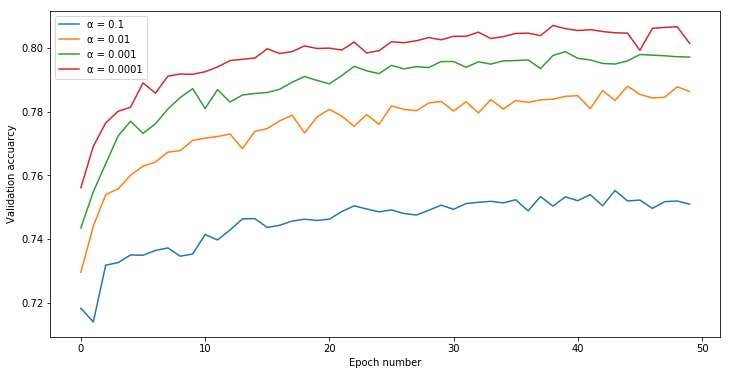

In [128]:
fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(111)
model_num = 50
for model in results.keys():
    ax1.plot(np.arange(model_num),results[model][3], linestyle='-',label=model)

ax1.legend(loc=0)
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Validation accuarcy')
#plt.ylim(0.78,0.81)
plt.show()
fig.savefig("tune_const_alpha.pdf")

In [45]:
def read_results(filename):
    f = open(filename)
    a = f.read()
    results = eval(a)
    f.close()
    return results

f_q = '/Users/zhang/MscProject_tweak2vec/word2vecModel/quora_data/quora_data.txt'
f_p1 = '/Users/zhang/MscProject_tweak2vec/word2vecModel/quora_data/pivots100_data.txt'
f_p3 = '/Users/zhang/MscProject_tweak2vec/word2vecModel/quora_data/pivots300_data.txt'
f_p3k = '/Users/zhang/MscProject_tweak2vec/word2vecModel/quora_data/pivots3000_data.txt'
f_p7k = '/Users/zhang/MscProject_tweak2vec/word2vecModel/quora_data/pivots7000_data.txt'
f_pf = '/Users/zhang/MscProject_tweak2vec/word2vecModel/quora_data/pivotsfull_data.txt'
f_pa = '/Users/zhang/MscProject_tweak2vec/word2vecModel/quora_data/pivotsfull_alpha_data.txt'
f_pcat = '/Users/zhang/MscProject_tweak2vec/word2vecModel/quora_data/concat_reg_data.txt'
f_ret = '/Users/zhang/MscProject_tweak2vec/word2vecModel/quora_data/retrain_data.txt'
results_q = read_results(f_q)
results_p1 = read_results(f_p1)
results_p3 = read_results(f_p3)
results_p3k = read_results(f_p3k)
results_p7k = read_results(f_p7k)
results_pf = read_results(f_pf)
results_pa = read_results(f_pa)
results_pcat = read_results(f_pcat)
results_ret = read_results(f_ret)
indice = [0,1,2,3,4,6,8]

In [47]:
val_acc_ret = []
for model in results_ret.keys():
    val_acc_ret.append(np.max(np.array(results_ret[model]['val_acc'])))
val_acc_ret.reverse()
val_acc_ret

[0.7954982685648326,
 0.7917330841532457,
 0.7850272082669159,
 0.7885450447974496,
 0.7960204474248337,
 0.8008574726543176,
 0.8073984499532787]

In [8]:
val_acc_q = []
for model in results_q.keys():
    val_acc_q.append(np.max(np.array(results_q[model]['val_acc'])))
val_acc_q.reverse()
val_acc_q = [val_acc_q[i] for i in indice]
val_acc_q

[0.7185730775573023,
 0.7846699279942835,
 0.7848073434837575,
 0.789561919419557,
 0.7938767657890398,
 0.7972846699279943,
 0.8014071346122135]

In [131]:
val_acc_p1 = []
for model in results_p1.keys():
    val_acc_p1.append(np.max(np.array(results_p1[model]['val_acc'])))
val_acc_p1.reverse()
val_acc_p1 = [val_acc_p1[i] for i in indice]
val_acc_p1

[0.7255537844225801,
 0.7855768702248117,
 0.7843676139174408,
 0.7915956686637717,
 0.7954707854669378,
 0.7971197713406255,
 0.8003352937943164]

In [132]:
val_acc_p3 = []
for model in results_p3.keys():
    val_acc_p3.append(np.max(np.array(results_p3[model]['val_acc'])))
val_acc_p3.reverse()
val_acc_p3 = [val_acc_p3[i] for i in indice]
val_acc_p3

[0.6871873797614467,
 0.7834331885890178,
 0.7855768702248117,
 0.790633760237454,
 0.7914857362721927,
 0.7995108008574726,
 0.7983839938437861]

In [133]:
val_acc_p3k = []
for model in results_p3k.keys():
    val_acc_p3k.append(np.max(np.array(results_p3k[model]['val_acc'])))
val_acc_p3k.reverse()
val_acc_p3k

[0.7159621832572968,
 0.7876655856648161,
 0.7879404166437641,
 0.7967350079700984,
 0.7992634529764195,
 0.8073709668553839,
 0.8067938217995932]

In [134]:
val_acc_p7k = []
for model in results_p7k.keys():
    val_acc_p7k.append(np.max(np.array(results_p7k[model]['val_acc'])))
val_acc_p7k.reverse()
val_acc_p7k

[0.7209641070741494,
 0.7848897927774419,
 0.7890947067553454,
 0.7973946023195735,
 0.8012422360248447,
 0.8059968119606442,
 0.8067663387016984]

In [13]:
val_acc_pf = []
for model in results_pf.keys():
    val_acc_pf.append(np.max(np.array(results_pf[model]['val_acc'])))
val_acc_pf.reverse()
val_acc_pf

[0.6836970263288078,
 0.7879953828395537,
 0.7927224756774583,
 0.7994283515637882,
 0.8051448359259056,
 0.8100093442532842,
 0.8094321991974935]

In [7]:
val_acc_pa = []
for model in results_pa.keys():
    val_acc_pa.append(np.max(np.array(results_pa[model]['val_acc'])))
val_acc_pa.reverse()
val_acc_pa

[0.7190952564173033,
 0.7898092673006101,
 0.7950585389985159,
 0.800390259990106,
 0.8035508162480075,
 0.8077282471280163,
 0.8077007640301215]

In [4]:
val_acc_pcat = []
for model in results_pcat.keys():
    val_acc_pcat.append(np.max(np.array(results_pcat[model]['val_acc'])))
val_acc_pcat.reverse()
val_acc_pcat

[0.7971197713406255,
 0.7980816797669433,
 0.7983839938437861,
 0.8040455120101138,
 0.8037431979332711,
 0.8055845654922222,
 0.8089375034353873]

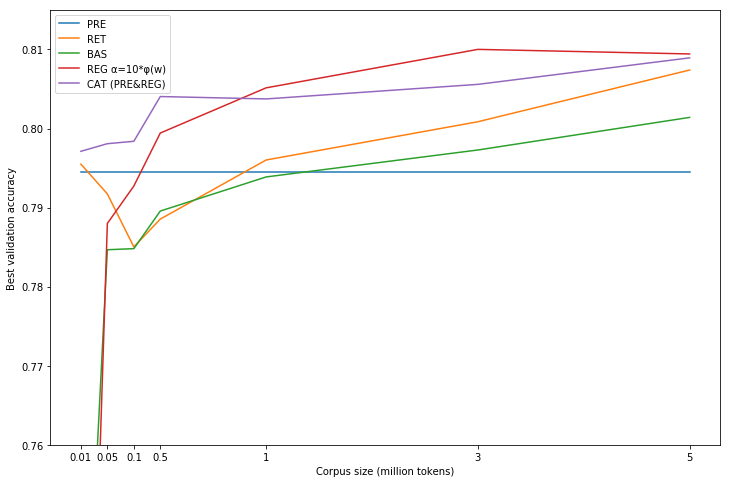

In [49]:
google_line = 0.7945
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot(111)

labels = ['0.01','0.05','0.1','0.5','1','3','5']
model_num = [2,4,6,8,16,32,48]
ax1.plot(model_num,np.ones(7) * np.max(google_line), linestyle='-', label='PRE')
ax1.plot(model_num,val_acc_ret, linestyle='-',label='RET')
ax1.plot(model_num,val_acc_q, linestyle='-',label='BAS')
# ax1.plot(model_num,val_acc_p1, linestyle='-',label='pivots 100')
# ax1.plot(model_num,val_acc_p3, linestyle='-',label='pivots 300')
# ax1.plot(model_num,val_acc_p3k, linestyle='-',label='pivots 3000')
# ax1.plot(model_num,val_acc_p7k, linestyle='-',label='pivots 7000')
ax1.plot(model_num,val_acc_pf, linestyle='-',label='REG α=10*φ(w)')
# ax1.plot(model_num,val_acc_pa, linestyle='-',label='REG α=10*φ(w)')
ax1.plot(model_num,val_acc_pcat, linestyle='-',label='CAT (PRE&REG)')
ax1.legend(loc=0)
plt.xticks(model_num,labels)

ax1.set_xlabel('Corpus size (million tokens)')
ax1.set_ylabel('Best validation accuracy')
plt.ylim(0.76,0.815)
plt.show()
fig.savefig('quora_all.pdf')

### pubmed

In [53]:
google_result_val = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/google_val_acc.npy')
np.max(google_result_val)

0.77555275

In [60]:
pub_result_val = {}
pub_result_val['pubmed 3m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pubmed_3m_val_acc.npy')
pub_result_val['pubmed 2m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pubmed_2m_val_acc.npy')
pub_result_val['pubmed 1m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pubmed_1m_val_acc.npy')
pub_result_val['pubmed 05m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pubmed_05m_val_acc.npy')
pub_result_val['pubmed 01m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pubmed_01m_val_acc.npy')
pub_result_val['pubmed 005m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pubmed_005m_val_acc.npy')
pub_result_val['pubmed 001m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pubmed_001m_val_acc.npy')

In [61]:
concat_result_val = {}
concat_result_val['pubmed 3m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/concat_pubmed_3m_val_acc.npy')
concat_result_val['pubmed 2m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/concat_pubmed_2m_val_acc.npy')
concat_result_val['pubmed 1m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/concat_pubmed_1m_val_acc.npy')
concat_result_val['pubmed 05m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/concat_pubmed_05m_val_acc.npy')
concat_result_val['pubmed 01m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/concat_pubmed_01m_val_acc.npy')
concat_result_val['pubmed 005m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/concat_pubmed_005m_val_acc.npy')
concat_result_val['pubmed 001m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/concat_pubmed_001m_val_acc.npy')

In [62]:
concat_pivotsfull_result_val = {}
concat_pivotsfull_result_val['pubmed 3m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/concat_pivotsfull_3m_val_acc.npy')
concat_pivotsfull_result_val['pubmed 2m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/concat_pivotsfull_2m_val_acc.npy')
concat_pivotsfull_result_val['pubmed 1m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/concat_pivotsfull_1m_val_acc.npy')
concat_pivotsfull_result_val['pubmed 05m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/concat_pivotsfull_05m_val_acc.npy')
concat_pivotsfull_result_val['pubmed 01m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/concat_pivotsfull_01m_val_acc.npy')
concat_pivotsfull_result_val['pubmed 005m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/concat_pivotsfull_005m_val_acc.npy')
concat_pivotsfull_result_val['pubmed 001m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/concat_pivotsfull_001m_val_acc.npy')

In [63]:
pivots100_result_val = {}
pivots100_result_val['pubmed 3m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots100_3m_val_acc.npy')
pivots100_result_val['pubmed 2m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots100_2m_val_acc.npy')
pivots100_result_val['pubmed 1m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots100_1m_val_acc.npy')
pivots100_result_val['pubmed 05m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots100_05m_val_acc.npy')
pivots100_result_val['pubmed 01m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots100_01m_val_acc.npy')
pivots100_result_val['pubmed 005m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots100_005m_val_acc.npy')
pivots100_result_val['pubmed 001m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots100_001m_val_acc.npy')

In [64]:
pivots500_result_val = {}
pivots500_result_val['pubmed 3m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots500_3m_val_acc.npy')
pivots500_result_val['pubmed 2m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots500_2m_val_acc.npy')
pivots500_result_val['pubmed 1m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots500_1m_val_acc.npy')
pivots500_result_val['pubmed 05m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots500_05m_val_acc.npy')
pivots500_result_val['pubmed 01m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots500_01m_val_acc.npy')
pivots500_result_val['pubmed 005m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots500_005m_val_acc.npy')
pivots500_result_val['pubmed 001m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots500_001m_val_acc.npy')

In [65]:
pivots1000_result_val = {}
pivots1000_result_val['pubmed 3m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots1000_3m_val_acc.npy')
pivots1000_result_val['pubmed 2m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots1000_2m_val_acc.npy')
pivots1000_result_val['pubmed 1m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots1000_1m_val_acc.npy')
pivots1000_result_val['pubmed 05m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots1000_05m_val_acc.npy')
pivots1000_result_val['pubmed 01m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots1000_01m_val_acc.npy')
pivots1000_result_val['pubmed 005m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots1000_005m_val_acc.npy')
pivots1000_result_val['pubmed 001m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivots1000_001m_val_acc.npy')

In [66]:
pivotsfull_result_val = {}
pivotsfull_result_val['pubmed 3m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivotsfull_3m_val_acc.npy')
pivotsfull_result_val['pubmed 2m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivotsfull_2m_val_acc.npy')
pivotsfull_result_val['pubmed 1m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivotsfull_1m_val_acc.npy')
pivotsfull_result_val['pubmed 05m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivotsfull_05m_val_acc.npy')
pivotsfull_result_val['pubmed 01m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivotsfull_01m_val_acc.npy')
pivotsfull_result_val['pubmed 005m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivotsfull_005m_val_acc.npy')
pivotsfull_result_val['pubmed 001m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/pivotsfull_001m_val_acc.npy')

In [67]:
retrain_result_val = {}
retrain_result_val['pubmed 3m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/retrain_3m_val_acc.npy')
retrain_result_val['pubmed 2m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/retrain_2m_val_acc.npy')
retrain_result_val['pubmed 1m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/retrain_1m_val_acc.npy')
retrain_result_val['pubmed 05m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/retrain_05m_val_acc.npy')
retrain_result_val['pubmed 01m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/retrain_01m_val_acc.npy')
retrain_result_val['pubmed 005m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/retrain_005m_val_acc.npy')
retrain_result_val['pubmed 001m'] = np.load('/Users/zhang/MscProject_tweak2vec/data/pubmed/retrain_001m_val_acc.npy')

In [68]:
retrain_acc = []
for key in retrain_result_val.keys():
    retrain_acc.append(np.max(retrain_result_val[key]))
retrain_acc.reverse()
retrain_acc

[0.78581357,
 0.76453066,
 0.75940025,
 0.7757183,
 0.78664106,
 0.7958427,
 0.8031246]

In [69]:
pubmed_acc = []
for key in pub_result_val.keys():
    pubmed_acc.append(np.max(pub_result_val[key]))
pubmed_acc.reverse()
pubmed_acc

[0.7262346,
 0.73080236,
 0.72987556,
 0.75324374,
 0.7774394,
 0.78283465,
 0.78697205]

In [70]:
pivots100_acc = []
for key in pivots100_result_val.keys():
    pivots100_acc.append(np.max(pivots100_result_val[key]))
pivots100_acc.reverse()
pivots100_acc

[0.72342116, 0.7291474, 0.7412617, 0.7591354, 0.77598304, 0.7846551, 0.7894876]

In [71]:
pivots500_acc = []
for key in pivots500_result_val.keys():
    pivots500_acc.append(np.max(pivots500_result_val[key]))
pivots500_acc.reverse()
pivots500_acc

[0.7332186, 0.7400371, 0.74728584, 0.77234215, 0.783298, 0.792268, 0.79835826]

In [72]:
pivots1000_acc = []
for key in pivots100_result_val.keys():
    pivots1000_acc.append(np.max(pivots1000_result_val[key]))
pivots1000_acc.reverse()
pivots1000_acc

[0.729346, 0.74480337, 0.74622667, 0.7690984, 0.7868066, 0.79137427, 0.7958758]

In [73]:
pivotsfull_acc = []
for key in pivots500_result_val.keys():
    pivotsfull_acc.append(np.max(pivotsfull_result_val[key]))
pivotsfull_acc.reverse()
pivotsfull_acc

[0.72441417,
 0.7608897,
 0.76390177,
 0.7890573,
 0.79958296,
 0.80070835,
 0.8096121]

In [74]:
concat_acc = []
for key in concat_result_val.keys():
    concat_acc.append(np.max(concat_result_val[key]))
concat_acc.reverse()
concat_acc

[0.7824705, 0.7846882, 0.78730303, 0.78766716, 0.7991527, 0.7996491, 0.8002449]

In [75]:
concat_pivotsfull_acc = []
for key in concat_pivotsfull_result_val.keys():
    concat_pivotsfull_acc.append(np.max(concat_pivotsfull_result_val[key]))
concat_pivotsfull_acc.reverse()
concat_pivotsfull_acc

[0.7834304, 0.7795909, 0.7825698, 0.78962004, 0.7939891, 0.79733217, 0.7985238]

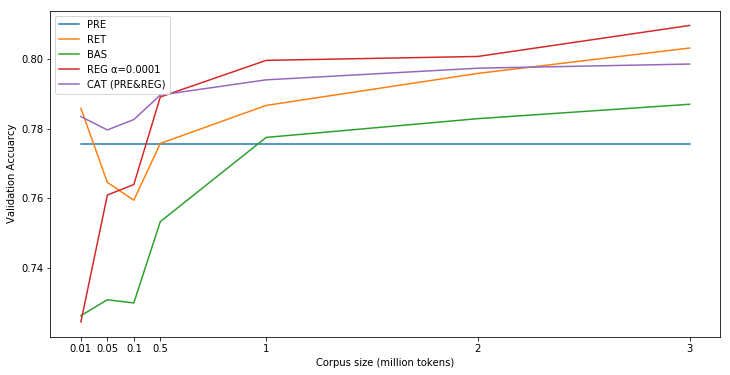

In [78]:
fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(111)
labels = ['0.01','0.05','0.1','0.5','1','2','3']
model_num = [2,4,6,8,16,32,48]

ax1.plot(model_num,np.ones(7) * np.max(google_result_val), linestyle='-', label='PRE')
ax1.plot(model_num,retrain_acc, linestyle='-', label='RET')
ax1.plot(model_num,pubmed_acc, linestyle='-', label='BAS')
#ax1.plot(model_num,pivots100_acc, linestyle='-', label='100 pivots')
#ax1.plot(model_num,pivots500_acc, linestyle='-', label='500 pivots')
#ax1.plot(model_num,pivots1000_acc, linestyle='-', label='1000 pivots')
ax1.plot(model_num,pivotsfull_acc, linestyle='-', label='REG α=0.0001')
ax1.plot(model_num,concat_pivotsfull_acc, linestyle='-', label='CAT (PRE&REG)')
#ax1.plot(model_num,concat_acc, linestyle='-', label='CAT (PRE&BAS)')

ax1.legend(loc=0)
plt.xticks(model_num,labels)
ax1.set_xlabel('Corpus size (million tokens)')
ax1.set_ylabel('Validation Accuarcy')
#plt.ylim(0.74,0.79)
plt.show()
plt.savefig('pubmed_all.pdf')